# Ice fitting workshop - 15/October/2024

### About ENIIGMA

This Jupyter notebook contains a tutorial of the ENIIGMA fitting tool (Rocha et al. 2021).
Specifically, it shows: 

(I) the steps for continuum determination of the infrared spectrum of protostars;

(II) how to perform the spectral fitting of ice bands using laboratory spectrum;

(III) introduce the statistical analysis after the fit, which covers confidence interval analysis, column density determination and degenacy assessment of the fits.

### Documentation

The ENIIGMA fitting tool has two sources of documentation:

1) Rocha et al. (2021): https://www.aanda.org/articles/aa/abs/2021/10/aa39360-20/aa39360-20.html

2) Readthedocs: https://eniigma-fitting-tool.readthedocs.io/en/latest/

### Example of literature citing ENIIGMA

- Rocha et al. (2024): https://www.aanda.org/articles/aa/full_html/2024/03/aa48427-23/aa48427-23.html
- McClure, Rocha et al. (2023): https://www.nature.com/articles/s41550-022-01875-w 

### Installation

You can find the installation steps and the required packages to run ENIIGMA at the "readthedocs" documentation.

### Jupyter notebook

ENIIGMA is also available as Jupyter notebooks. In that case, no installation is required.

### Import modules

As a standard python code, here, you import the modules needed to run the ENIIGMA functions.

In [1]:
import pyevolve
%matplotlib inline
from pyevolve import GSimpleGA
from ENIIGMA.GA import optimize
from ENIIGMA.GA import check_ga
from ENIIGMA.Stats import Pie_chart_plots
from ENIIGMA.Stats import Bar_chart_plots
from ENIIGMA.Stats import Stats_Module
from ENIIGMA.Stats import Degen_plots
import ENIIGMA
from pyevolve import G1DList, GSimpleGA, Selectors, Crossovers
from pyevolve import Initializators, Mutators, Consts
from pyevolve import Interaction
from pyevolve import Statistics
from pyevolve import DBAdapters
from pyevolve import Scaling

/Users/willrocha/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.20.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Genetic algorithm optimization

Once the optical depth is obtained, ENIIGMA performs the spectral fitting using the laboratory data. The function used here is **optimize.ENIIGMA**. The input information are:

1) **filename:** the path to the file containing the optical depth spectrumm;

2) the range to perform the fit;

3) **list_sp:** a list with the initial guess of species to start the fitting;

4) **group_comb:** sets how to group potential solutions to fit the observation data. This informaiton is used in the very last stage of the code.

5) **skip:** when *True* the code performs the fit using only the species included in the *list_sp*. When *False*, ENIIGMA searches for the best combination within the entire ensamble of laboratory data.

6) **pathlib:** when *None* the code uses the standard library of experimental data. Otherwise, users can indicate the path to their own library of data.

7) **ga_max:** sets a limit for the coefficients of the linear combination during the optmization process.


An example is given below:

 
 
|			ENIIGMA CODE				|
| A Python module for the decomposition of IR ice spectra using |
|        laboratory data and genetic modeling algorithm         |
|                   Current Version: V.0                        |
|                         April 2020                            |
DIR: /Users/willrocha/ENIIGMA_workshop_Toulouse/
Performing a linear combination of pure ices...
(0, 1, 2, 3, 4, 5, 6, 7)
0
CO_CO2_15Kbs.dat
1
CO.dat
2
H2O_NH3_Schutte.dat
3
H2O_CH3OH_8p.dat
4
pyroxene.dat
5
H2O_CH4_10_06_a_V3.dat
6
olivine.dat
7
CO_CH3OH_4_1_15K_bs.dat
round 1 of 1 Score = 0.208738
0 1
1 3
2 5
3 7
4 9
5 11
6 13
7 15
 
 
Final score values [Best fit]
----------------------------------
Reduced chi-square: 468596.5185048833
Chi-square: 3530874766.9342957
Akaike Information Criterion: 468612.53761569946
Root-mean-square error (RMSE): 0.20873830929017903
----------------------------------

 The elapsed time was: 286 sec


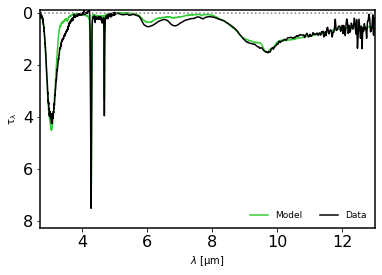

In [3]:
filename = 'AV60_cont_sub_example.od'
list_sp = ['CO', 'CO_CH3OH_4_1_15K_bs', 'H2O_CH3OH_8p', 'CO_CO2_15Kbs', 'H2O_CH4_10_06_a_V3', 'H2O_NH3_Schutte', 'olivine', 'pyroxene']

#optimize.ENIIGMA(filename, 2.7, 13.0, list_sp_skipTrue, group_comb=3, skip=True, pathlib = None, ga_max = 5.5)


optimize.ENIIGMA(filename, 2.7, 13.0, list_sp, group_comb=8, n_points=7544, skip=True, pathlib = None, 
                 ga_min = 0.0, ga_max = 5.5, mutp=0.01, popsize=100, fitness='rmse', 
                 mutator=Mutators.G1DListMutatorRealGaussian,crossover=Crossovers.G1DBinaryStringXSinglePoint, 
                 scaling=Scaling.LinearScaling,selector=Selectors.GTournamentSelector, 
                 termination=GSimpleGA.ConvergenceCriteria)


# Plot components

/Users/willrocha/ENIIGMA_workshop_Toulouse
names
['H2O_NH3_Schutte', 'H2O_CH3OH_8p', 'pyroxene', 'CO_CO2_15Kbs', 'CO', 'olivine', 'H2O_CH4_10_06_a_V3', 'CO_CH3OH_4_1_15K_bs']
-----------
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_00.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_01.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_02.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_03.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_04.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_05.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_06.comp
/Users/willrocha/ENIIGMA_workshop_Toulouse/Workspace/Processing/Interp_proc/Component_07.comp


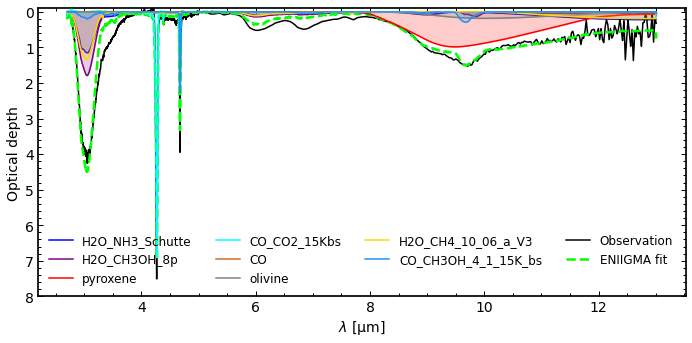

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os
import pandas as pd
from scipy import interpolate
from matplotlib.patches import Rectangle
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, ScalarFormatter, LogLocator
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['axes.linewidth'] = 1.7

pp = PdfPages('Components.pdf')

print(os.getcwd())

folder = os.getcwd() + '/'
files_L   = folder+'New_tau_GA.txt'

comp_path = folder+'Workspace/Processing/Interp_proc/*.comp'
allcomp = sorted(glob.glob(comp_path))

Best = folder+'Workspace/Processing/Interp_proc/Best_comb.csv'

df = pd.read_csv(Best,sep=',', header=1)
n_genes = df.shape[1] - 3 # number of genes

data = pd.read_csv(Best,sep=',', usecols=['name'], nrows=n_genes)
names = data.T.values.tolist()[0]

print('names')
print(names)
print('-----------')

l1,f1, ef1= np.loadtxt(files_L,dtype=float, usecols=(0,1,2)).T

fig1=plt.figure(figsize=(30,10.0))
frame1=fig1.add_axes((.1,.8,.3,.4))

### 5 components

cf = []
order = []
colours = []
cc=['blue', 'purple', 'red', 'cyan', 'chocolate', 'grey', 'gold', 'dodgerblue', 'indigo', 'orange', 
        'magenta', 'green', 'lightgreen', 'tan', 'darkcyan', 'slateblue', 'crimson']

for r in range(len(names)):
    cf.append(1.0)
    order.append(r+1)
    col = cc[r]
    colours.append(col)
    
#cf = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#order = [1,2,3,4,5,6]
#colors=['blue', 'purple', 'red', 'cyan', 'chocolate', 'green']

lbs = names

#exit()
yff = 0.
crange = range(len(cf))
for i in crange:
    #n = names[i]
    #print('Looking here:', allcomp[i])
    Xsp, Ysp = np.loadtxt(allcomp[i],dtype=float, usecols=(0,1)).T
    print(allcomp[i])
    yff += Ysp*cf[i]
    yff0 = Ysp*cf[i]
    frame1.plot(Xsp, yff0, color=colours[i], label=lbs[i], zorder=order[i])
    frame1.fill_between(Xsp, yff0, 0, color=colours[i], zorder=order[i], alpha=0.2)
    frame1.tick_params(which='major', length=5, width=1, direction='in', labelsize=12)
    frame1.tick_params(which='minor', length=3, width=1, direction='in', labelsize=12)
    frame1.yaxis.set_ticks_position('both')
    frame1.xaxis.set_ticks_position('both')


plt.plot(l1,f1, c='k', label='Observation')

plt.plot(Xsp, yff, linestyle='--', c='lime', label = 'ENIIGMA fit', linewidth=2.5)

np.savetxt('Bestfit.txt', np.transpose([Xsp, yff]))

plt.legend(loc='lower left', ncol=4, fontsize=12, frameon=False)
plt.ylabel(r'Optical depth',fontsize=14)
plt.xlabel(r'$\lambda\ \mathrm{[\mu m]}$',fontsize=14)
plt.setp(frame1.get_xticklabels(), visible=True)
frame1.minorticks_on()
frame1.tick_params(which='major', length=5, width=1, direction='in', labelsize=14)
frame1.tick_params(which='minor', length=3, width=1, direction='in', labelsize=14)
frame1.yaxis.set_ticks_position('both')
frame1.xaxis.set_ticks_position('both')
#plt.xlim(2.7,27.0)
plt.ylim(8., -0.1)



#plt.tight_layout()
plt.savefig(pp,format='pdf', bbox_inches='tight')
plt.show()
plt.clf()


pp.close()

### Statistical analisys

This is the third and last module of the ENIIGMA fitting tool. We show here how to use ENIIGMA's functionalities to evaluate the goodness of the fit.

#### Pie chart

This is feature aims at ranking the best solutions based on their statistical significance. Specifically, ENIIGMA calculates how frequent (recurrent) is a specific laboratory data inside a given confidence interval. For example, if the recurrence is 100%, this means that this data is present in all solutions. When the recurrence drops, say 80%, it means that the data is still significant, but there are solutions where it is not used.

To create Pie Chart plots, one can use the function **Pie_chart_plots.pie**. This function requires the input of the parameter *sig_level*. This means the $sigma$ confidence interval required by the user.

An example is given below:

Creating pie chart...
[1. 1. 1. 1. 1. 1. 1. 1.] 1.0 [100. 100. 100. 100. 100. 100. 100. 100.]


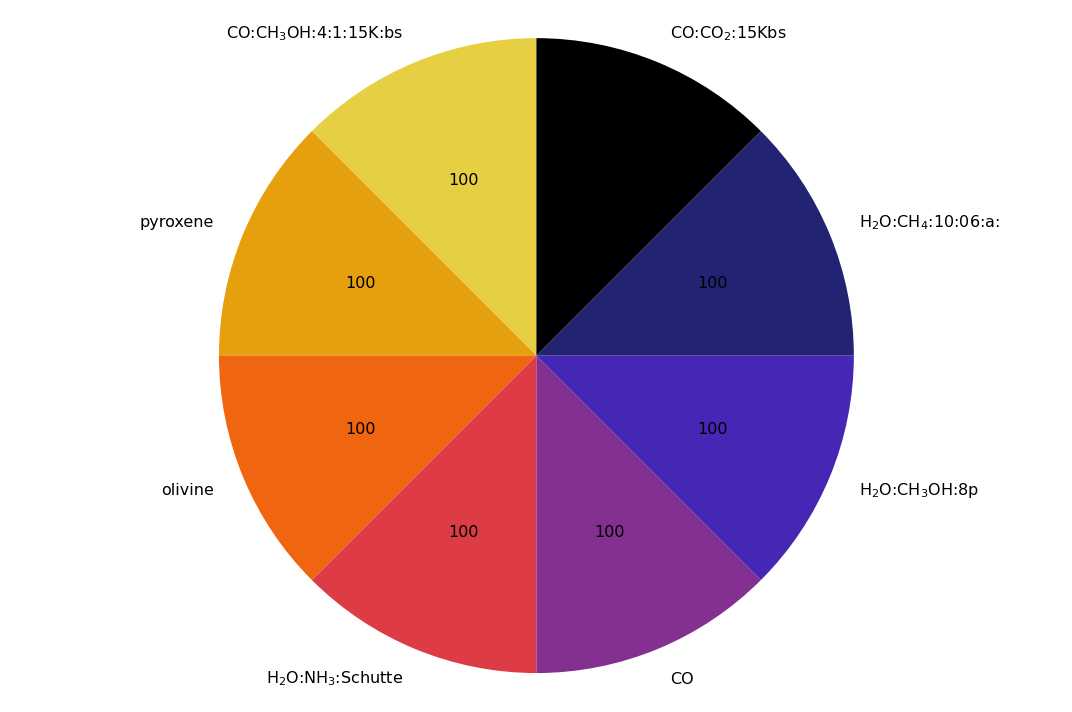

In [18]:
Pie_chart_plots.pie(sig_level=0.1)
#Bar_chart_plots.bar(sig_level=0.1)

#### Confidence intervals and column density determination

Here, ENIIGMA calculates the confidence intervals of the coefficients in the **best** solution. A few plots are created as output, which are described below in the sequence they appear:

1) Corner (triangle) plot: shows the correlations among all coefficients based on a $\chi^2$ analysis. In this case the confidence intervals are a function of the number of free parameters, not the goodness of the fit itself (see details in Avni & Bahcall 1980).

2) A plot with the best fit, and how it changes when the upper and lower confidence limits of the coefficients are adopted.

3) The best fit and the components overploted on the observational data. The residual fit is also shown.

4) A bar plot showing the column densities. **Note:** This only applies to the data included in the standard ENIIGMA library. If you uses your own library, ENIIGMA will not recognize, and consequently, no column density will be determined.

		RUNNING STATISTICAL MODULE
Calculation in progress....
1246.622447983002
1246.3923026499642
1246.1622361964878
1245.9322486050426
1245.7023398581027
1245.4725099381483
1245.2427588276637
1245.013086509139
1244.7834929650694
1244.553978177956
1244.3245421303031
1244.0951848046225
1243.8659061834294
1243.636706249246
1243.4075849845974
1243.178542372016
1242.9495783940374
1242.7206930332045
1242.4918862720633
1242.263158093167
1242.0345084790722
1241.8059374123413
1241.5774448755424
1241.3490308512482
1241.120695322036
1240.8924382704897
1240.6642596791971
1240.4361595307514
1240.2081378077519
1239.9801944928015
1239.75232956851
1239.5245430174905
1239.296834822362
1239.0692049657496
1238.8416534302821
1238.6141801985943
1238.3867852533256
1238.1594685771215
1237.9322301526304
1237.705069962509
1237.4779879894168
1237.2509842160189
1237.0240586249865
1236.797211198994
1236.570441920723
1236.3437507728588
1236.1171377380927
1235.8906027991202
1235.6641459386428
1235.4377671393668
1235.2

1142.7781556235327
1142.584728737991
1142.3913727135136
1142.1980875349036
1142.0048731869701
1141.8117296545256
1141.6186569223873
1141.4256549753761
1141.2327237983188
1141.0398633760449
1140.847073693389
1140.6543547351898
1140.461706486291
1140.2691289315392
1140.0766220557866
1139.8841858438896
1139.6918202807083
1139.499525351107
1139.307301039956
1139.1151473321277
1138.9230642125003
1138.731051665956
1138.5391096773808
1138.3472382316654
1138.155437313705
1137.963706908399
1137.7720470006507
1137.5804575753682
1137.3889386174637
1137.1974901118538
1137.0061120434593
1136.8148043972053
1136.6235671580218
1136.4324003108418
1136.2413038406032
1136.0502777322495
1135.8593219707263
1135.668436540985
1135.4776214279807
1135.286876616673
1135.0962020920256
1134.9055978390065
1134.7150638425885
1134.524600087748
1134.3342065594657
1134.1438832427273
1133.953630122522
1133.763447183844
1133.5733344116907
1133.3832917910652
1133.1933193069738
1133.0034169444268
1132.8135846884402
1132.6

1058.6166552172563
1058.4552506463226
1058.2939101812665
1058.1326338087922
1057.9714215156075
1057.8102732884236
1057.6491891139565
1057.4881689789245
1057.32721287005
1057.1663207740594
1057.0054926776827
1056.8447285676534
1056.6840284307086
1056.523392253589
1056.3628200230396
1056.2023117258082
1056.0418673486467
1055.8814868783109
1055.7211703015598
1055.560917605156
1055.4007287758666
1055.240603800461
1055.0805426657134
1054.9205453584016
1054.760611865306
1054.6007421732115
1054.440936268907
1054.2811941391842
1054.1215157708386
1053.9619011506702
1053.8023502654812
1053.6428631020788
1053.483439647273
1053.3240798878778
1053.1647838107106
1053.0055514025928
1052.8463826503491
1052.687277540808
1052.5282360608014
1052.3692581971654
1052.2103439367393
1052.0514932663657
1051.8927061728916
1051.7339826431669
1051.5753226640454
1051.4167262223853
1051.2581933050471
1051.099723898896
1050.9413179907995
1050.7829755676305
1050.624696616264
1050.4664811235793
1050.3083290764598
1050

987.7482668549684
987.6164017167206
987.4845946561776
987.3528456616842
987.2211547215878
987.0895218242391
986.9579469579919
986.8264301112029
986.6949712722325
986.5635704294436
986.4322275712025
986.3009426858786
986.1697157618441
986.0385467874746
985.9074357511496
985.77638264125
985.645387446161
985.5144501542705
985.3835707539698
985.2527492336533
985.1219855817176
984.9912797865636
984.860631836595
984.7300417202182
984.5995094258427
984.4690349418815
984.338618256751
984.2082593588694
984.0779582366594
983.9477148785455
983.8175292729566
983.6874014083238
983.5573312730817
983.4273188556679
983.2973641445228
983.16746712809
983.0376277948168
982.9078461331529
982.7781221315512
982.6484557784677
982.5188470623615
982.3892959716952
982.2598024949335
982.1303666205453
982.0009883370019
981.8716676327778
981.7424044963507
981.6131989162011
981.4840508808126
981.3549603786726
981.2259273982704
981.0969519280994
980.9680339566555
980.8391734724378
980.7103704639483
980.5816249196926

929.8723684022068
929.7676233406246
929.6629309997776
929.5582913694204
929.453704439311
929.3491701992108
929.2446886388822
929.1402597480918
929.0358835166078
928.9315599342015
928.8272889906469
928.7230706757207
928.6189049792017
928.5147918908722
928.4107314005164
928.3067234979216
928.2027681728773
928.098865415176
927.9950152146127
927.8912175609856
927.7874724440944
927.6837798537426
927.5801397797355
927.4765522118814
927.3730171399914
927.2695345538789
927.1661044433599
927.0627267982536
926.9594016083807
926.856128863566
926.7529085536361
926.64974066842
926.5466251977498
926.4435621314601
926.3405514593884
926.2375931713743
926.1346872572601
926.031833706891
925.9290325101149
925.8262836567819
925.7235871367454
925.6209429398606
925.5183510559857
925.4158114749819
925.3133241867121
925.2108891810428
925.1085064478426
925.0061759769831
924.9038977583375
924.8016717817829
924.6994980371985
924.5973765144659
924.4953072034695
924.3932900940961
924.2913251762357
924.18941243978


884.3498802867595
884.2699827403635
884.190133160657
884.1103315386082
884.0305778651868
883.9508721313664
883.8712143281214
883.7916044464293
883.7120424772693
883.6325284116232
883.5530622404752
883.4736439548115
883.3942735456202
883.3149510038926
883.2356763206217
883.1564494868024
883.0772704934329
882.9981393315124
882.9190559920434
882.84002046603
882.7610327444787
882.6820928183987
882.6032006788009
882.5243563166987
882.4455597231076
882.3668108890456
882.2881098055327
882.2094564635916
882.1308508542462
882.052292968524
881.9737827974539
881.8953203320671
881.8169055633974
881.738538482481
881.6602190803554
881.5819473480611
881.503723276641
881.4255468571394
881.347418080604
881.2693369380837
881.1913034206301
881.1133175192972
881.035379225141
880.9574885292196
880.8796454225935
880.8018498963257
880.7241019414813
880.6464015491273
880.568748710333
880.4911434161704
880.4135856577135
880.3360754260383
880.2586127122233
880.1811975073489
880.1038298024984
880.0265095887568
8

851.0061086366784
850.9484999875249
850.8909351698635
850.8334141756848
850.7759369969822
850.7185036257504
850.6611140539864
850.6037682736891
850.5464662768596
850.4892080555004
850.4319936016161
850.3748229072136
850.3176959643015
850.2606127648903
850.2035733009925
850.1465775646224
850.0896255477969
850.0327172425337
849.9758526408535
849.9190317347785
849.8622545163328
849.8055209775425
849.7488311104355
849.6921849070419
849.6355823593938
849.5790234595247
849.5225081994708
849.4660365712697
849.409608566961
849.3532241785863
849.2968833981893
849.2405862178152
849.1843326295117
849.1281226253282
849.0719561973156
849.0158333375273
848.9597540380188
848.9037182908468
848.8477260880704
848.7917774217507
848.73587228395
848.680010666734
848.6241925621688
848.5684179623231
848.5126868592679
848.4569992450752
848.4013551118197
848.3457544515777
848.2901972564277
848.2346835184496
848.1792132297257
848.1237863823403
848.0684029683789
848.0130629799297
847.9577664090824
847.9025132479

<Figure size 432x288 with 0 Axes>

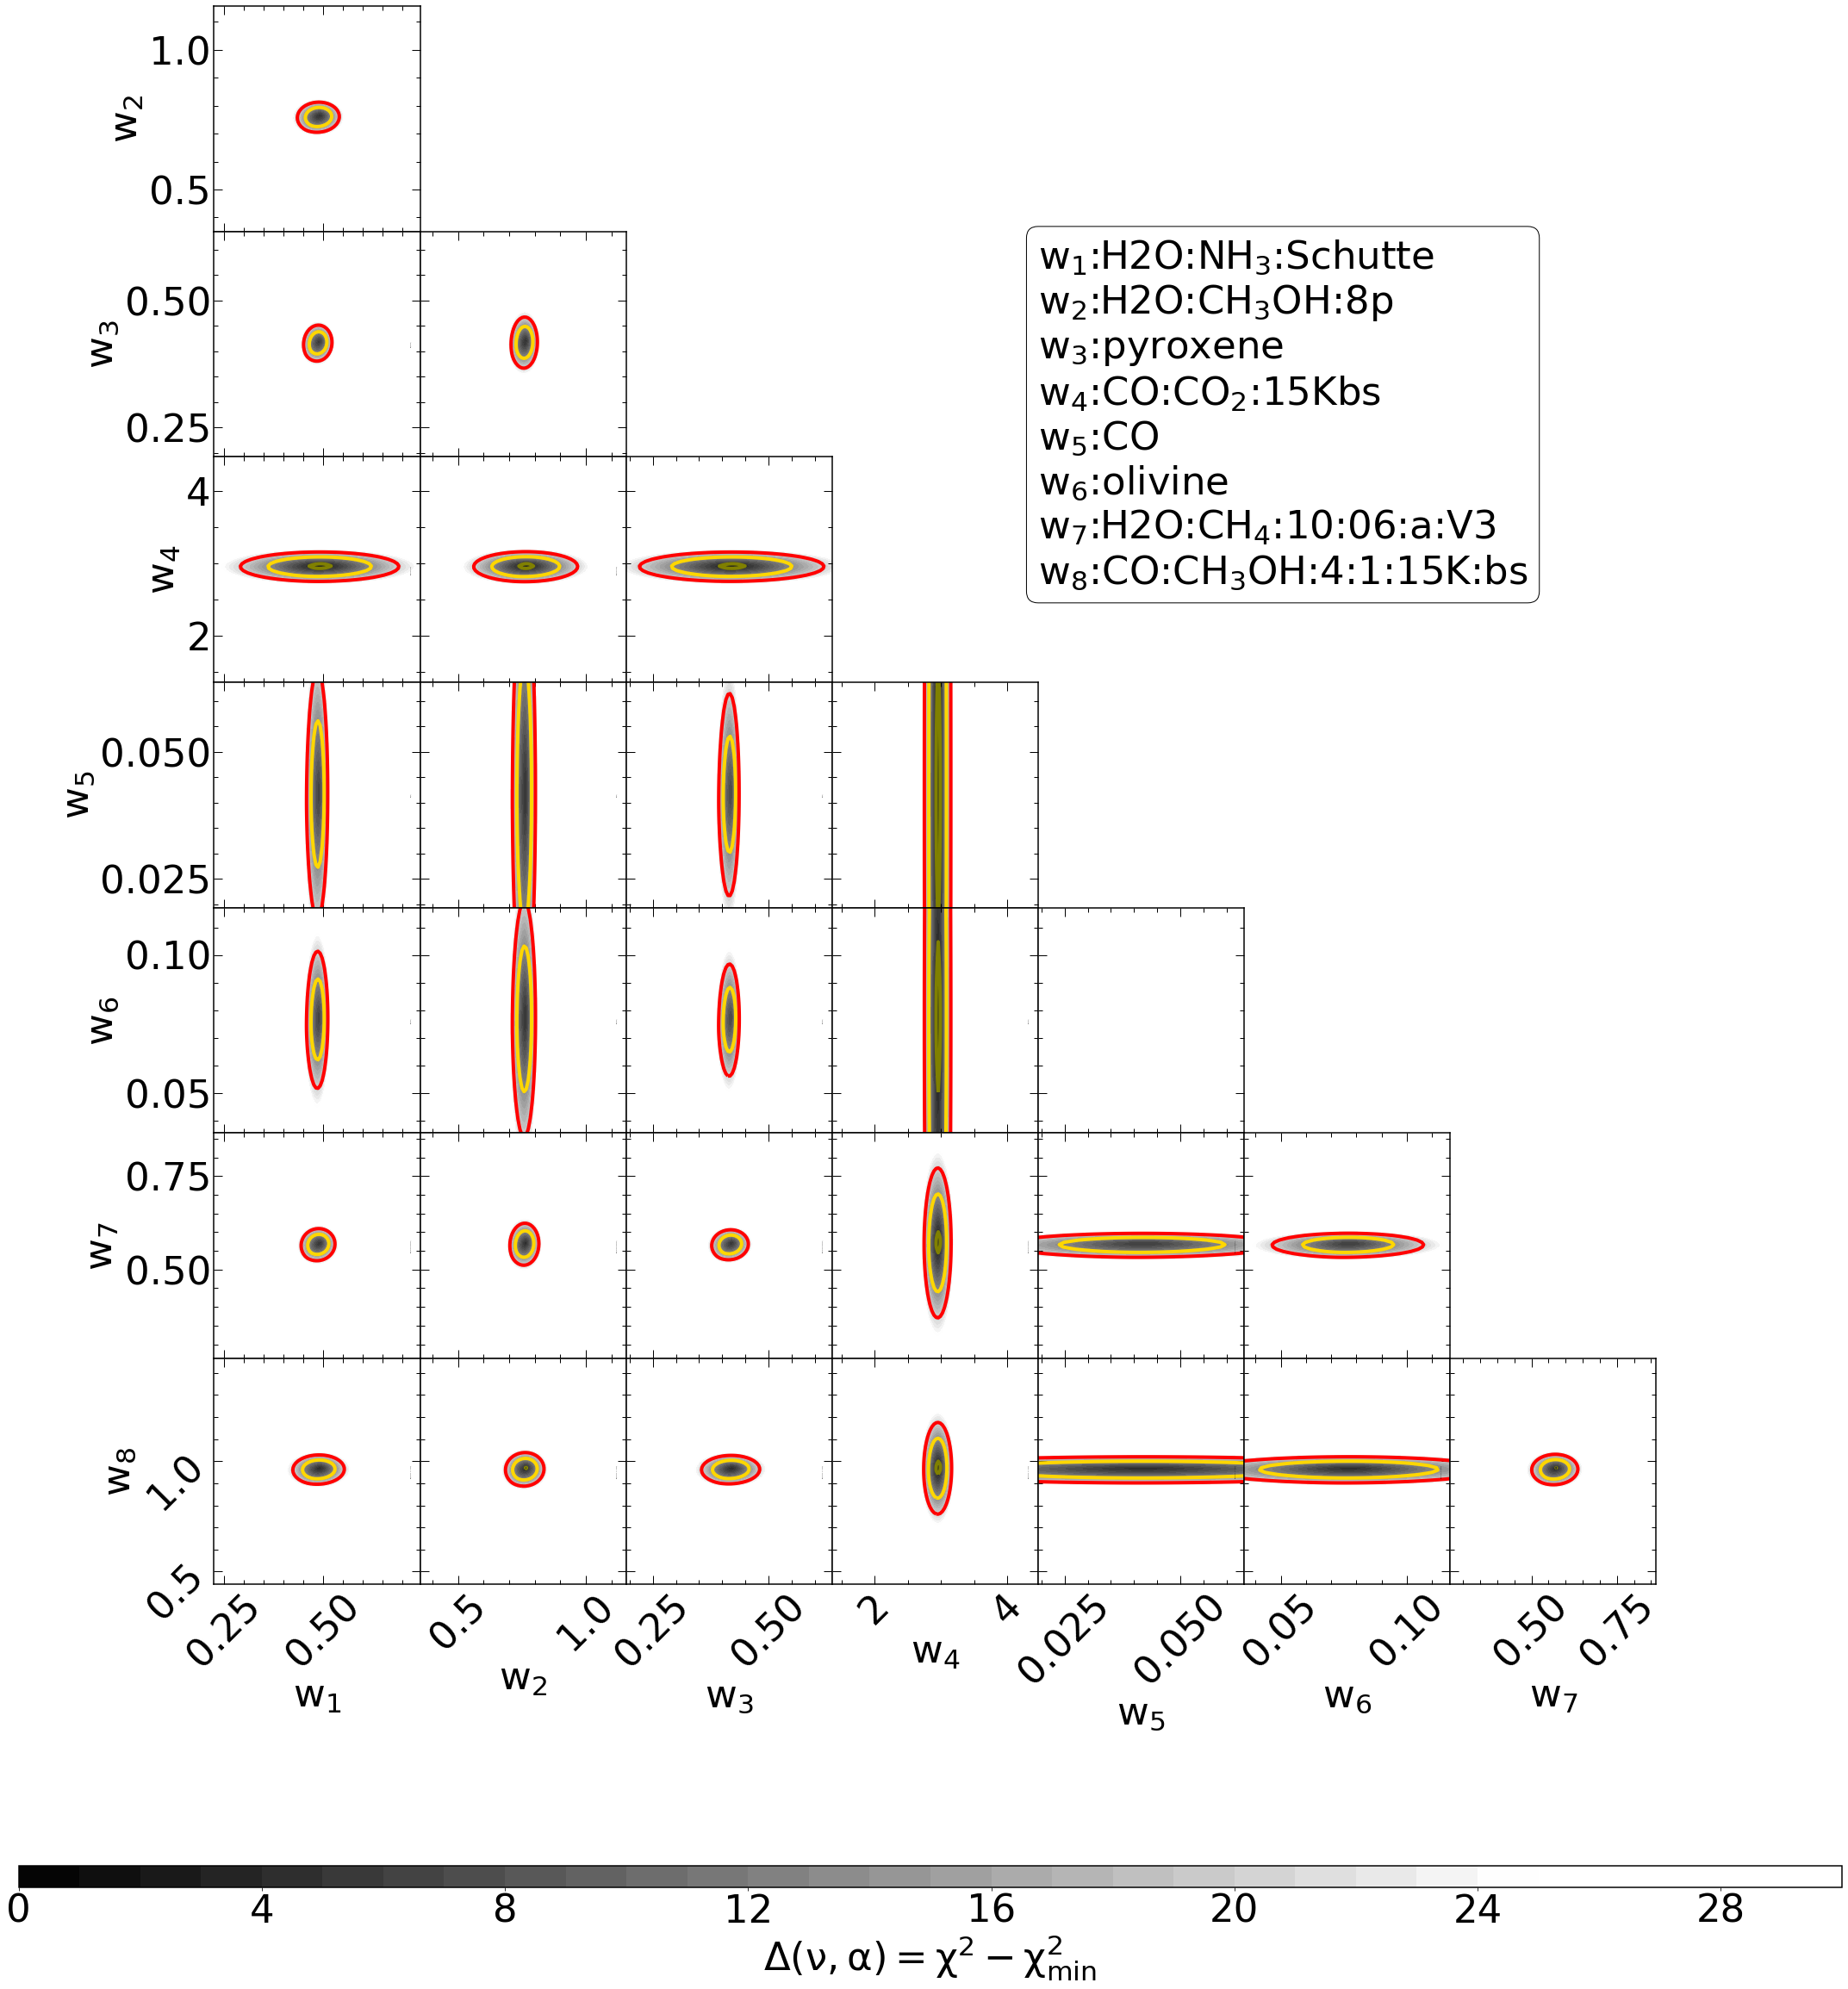

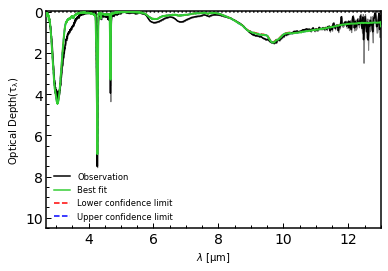

<Figure size 432x288 with 0 Axes>

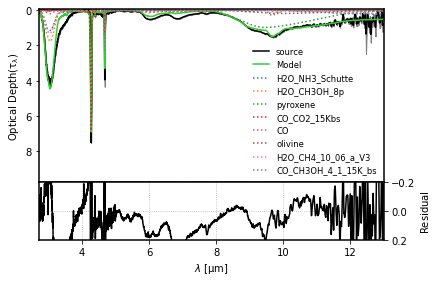

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
Stats_Module.stat(f_sig=0.1)

#### Mean column density determination

Ice fitting is not straightforward, and there are degeneracies intrinsic to the process. ENIIGMA provides a way to determine the mean ice column densities when all solutions (including the best solution) are taken into account. This can be done using the function **Degen_plots.merge_components**. 

As output, bar plots are shown containing the mean column densities, and the lower and upper limits.

An example is given below:

In [5]:
Degen_plots.merge_components_cd()

-------------------------------------------------------------------------
Searching for combinations inside 3 sigma confidence interval...
-------------------------------------------------------------------------
-------------------------------------------------------------------------
4  combinations found inside 3 sigma confidence interval

Deconvolving components and merging column densities...

Creating file: All_merge_final.csv
-------------------------------------------------------------------------
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_CH3OH_8p
Decomposing CO_CO2_15Kbs
Decomposing CO
Decomposing H2O_CH4_10_06_a_V3
Decomposing CO_CH3OH_4_1_15K_bs
Decomposing H2O_NH3_Schutte
Decomposing H2O_CH3OH_8p
Decomposing CO
Decomposing H2O_CH4_10_06_a

/Users/willrocha/ENIIGMA_workshop_Toulouse/ENIIGMA/Stats/Degen_plots.py:217: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df = pd.concat(list(map(pd.read_csv, glob.glob(os.path.join('', "output_*.csv")))),


---------------------------------------
Making Fig_comb_hist.pdf...
---------------------------------------


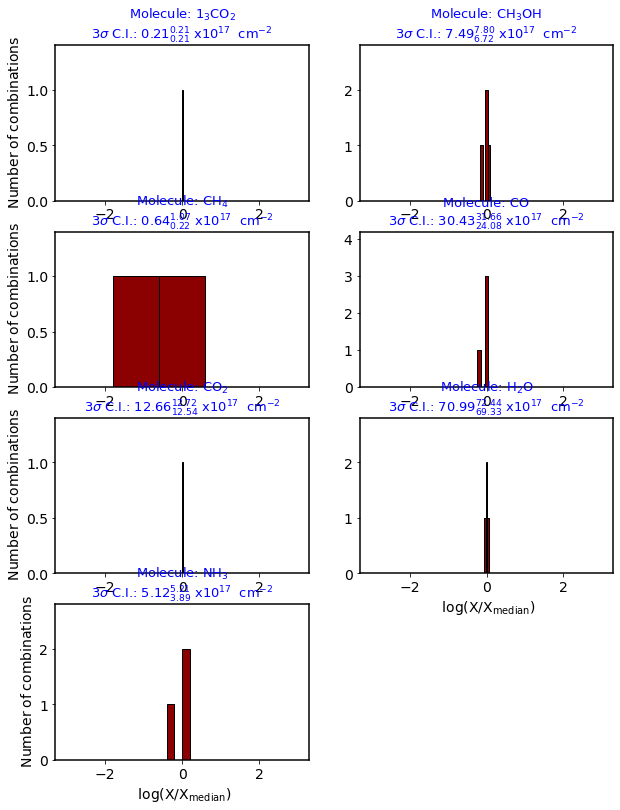

In [6]:
Degen_plots.hist_plot()